# Quantitative analysis using pynance and TaLib
# ================================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

 Starting Multi-Stock Analysis...

 Analyzing AAPL...
✅ Successfully loaded 10998 records for AAPL
📅 Date range: 1980-12-12 to 2024-07-30

 Calculating technical indicators for AAPL...
Technical indicators calculated successfully!

 Calculating financial metrics for AAPL...
Financial metrics calculated successfully!

 Analyzing AMZN...
✅ Successfully loaded 6846 records for AMZN
📅 Date range: 1997-05-15 to 2024-07-30

 Calculating technical indicators for AMZN...
Technical indicators calculated successfully!

 Calculating financial metrics for AMZN...
Financial metrics calculated successfully!

 Analyzing GOOGL...
✅ Successfully loaded 5020 records for GOOGL
📅 Date range: 2004-08-19 to 2024-07-30

 Calculating technical indicators for GOOGL...
Technical indicators calculated successfully!

 Calculating financial metrics for GOOGL...
Financial metrics calculated successfully!

 Analyzing META...
✅ Successfully loaded 2926 records for META
📅 Date range: 2012-12-12 to 2024-07-30

 Calcula

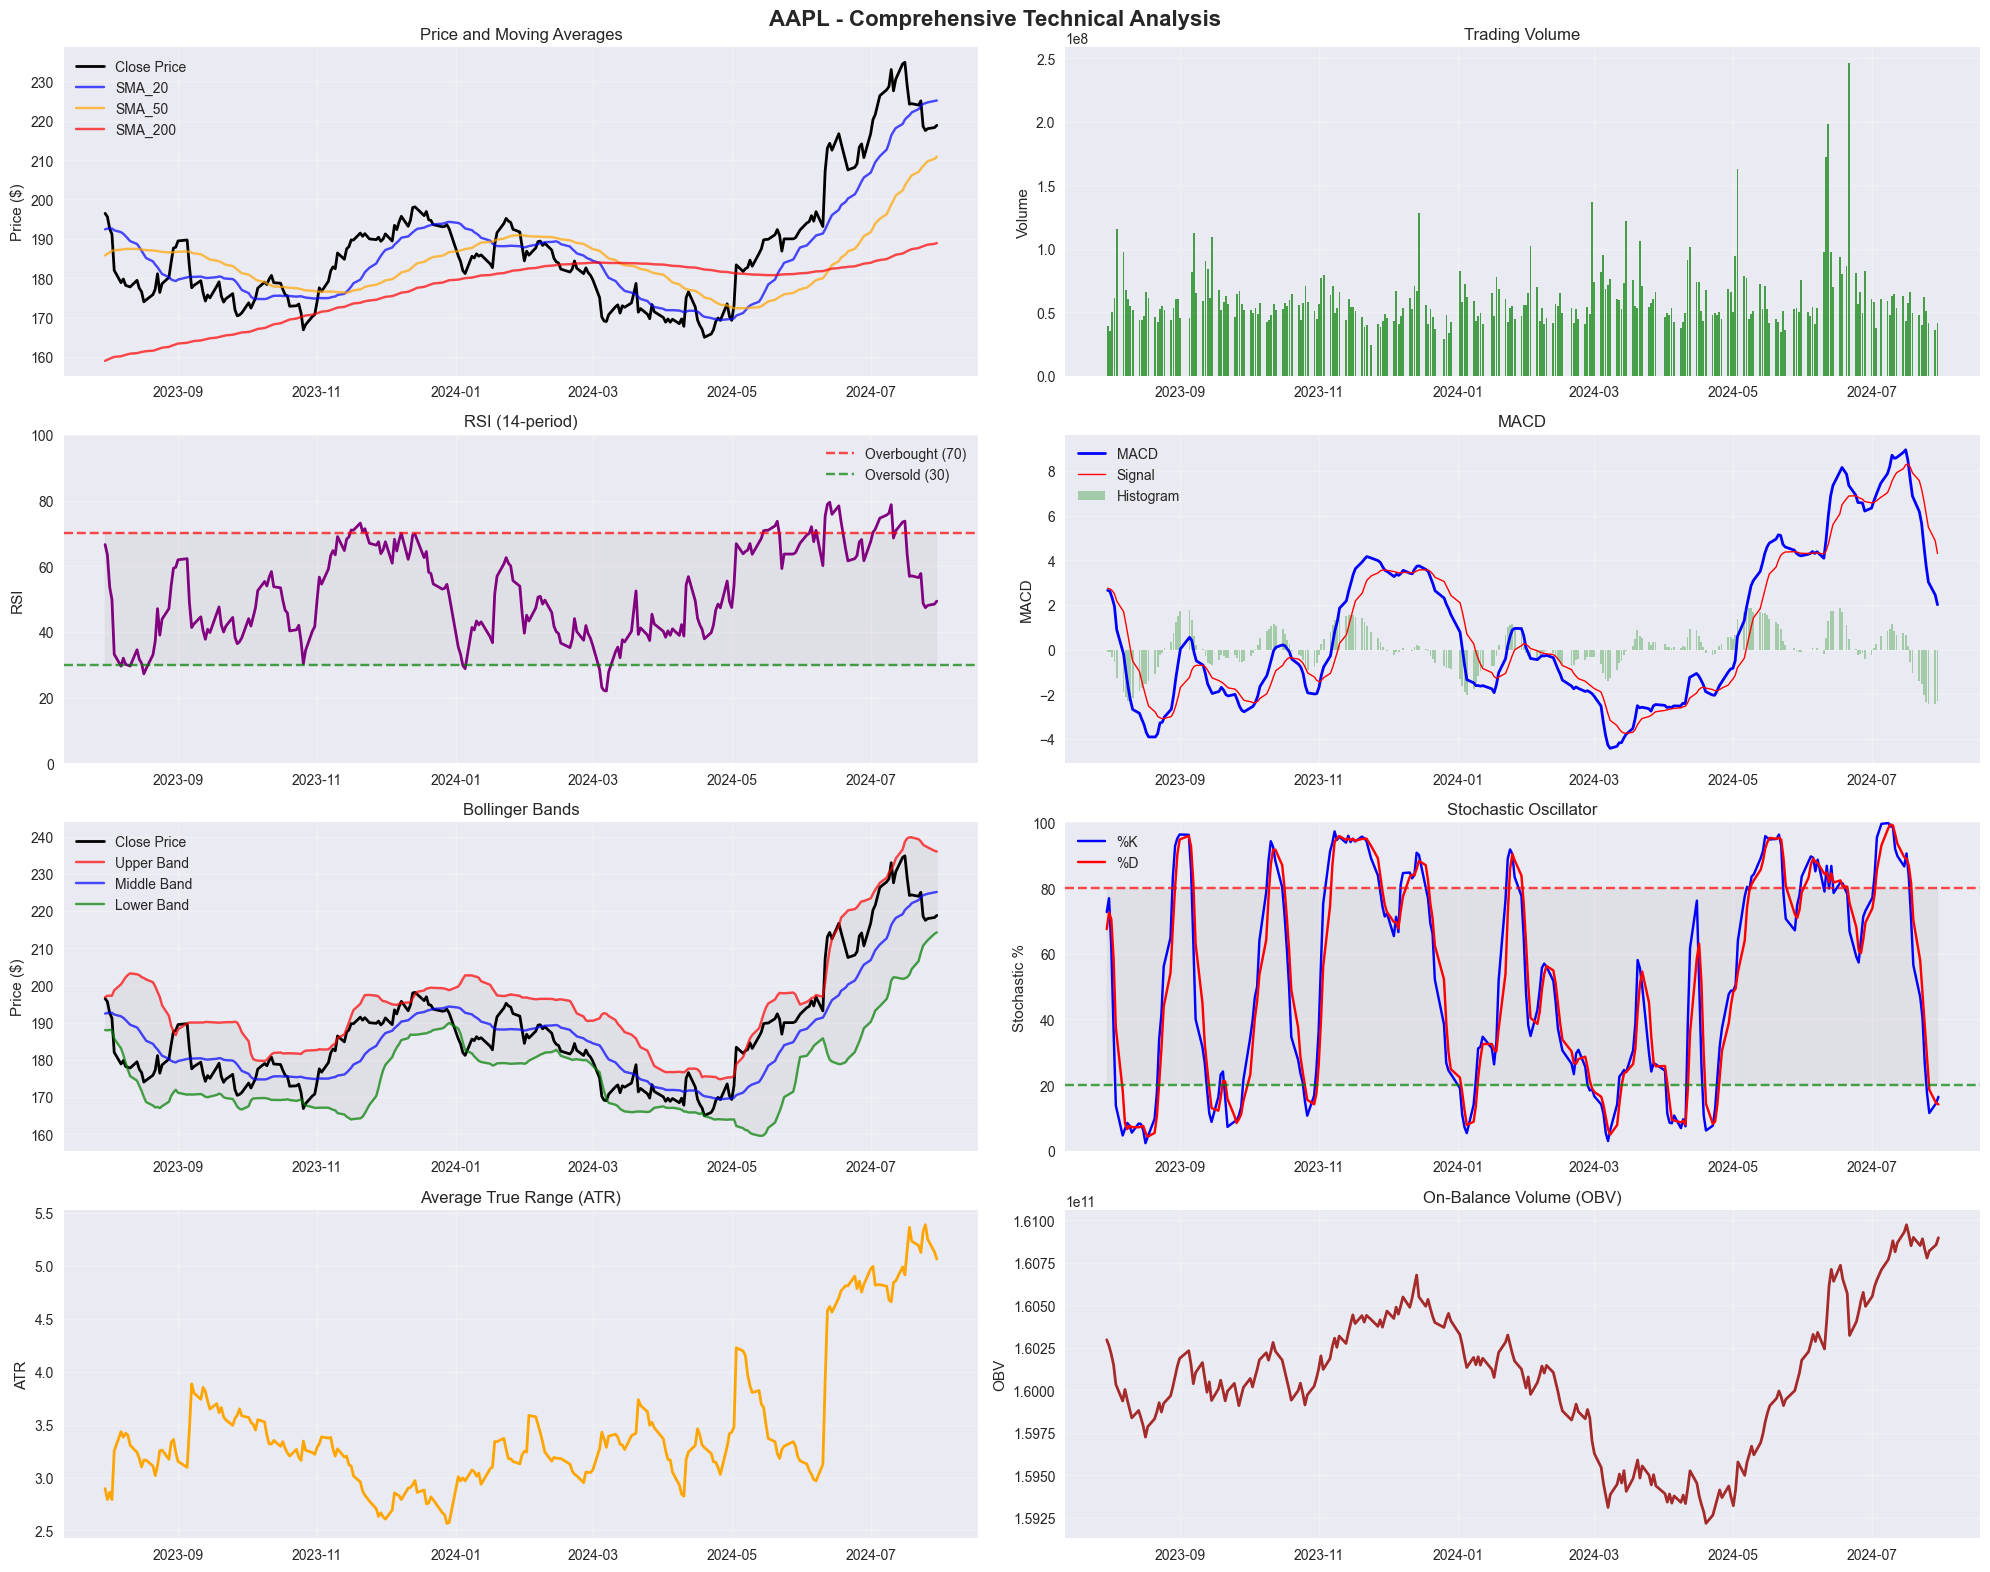


COMPREHENSIVE ANALYSIS SUMMARY - AMZN

 Calculating financial metrics for AMZN...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $181.71
   Volume (Last Day): 39,508,600.0
   Price Change (1Y): 35.93%

 TECHNICAL INDICATORS:
   RSI (14): 40.41
   MACD: -2.2810
   MACD Signal: -0.9942

 RISK METRICS:
   Volatility (Annualized): 56.24%
   Sharpe Ratio: 0.73
   Maximum Drawdown: -94.40%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum

📊 Creating visualizations for AMZN...


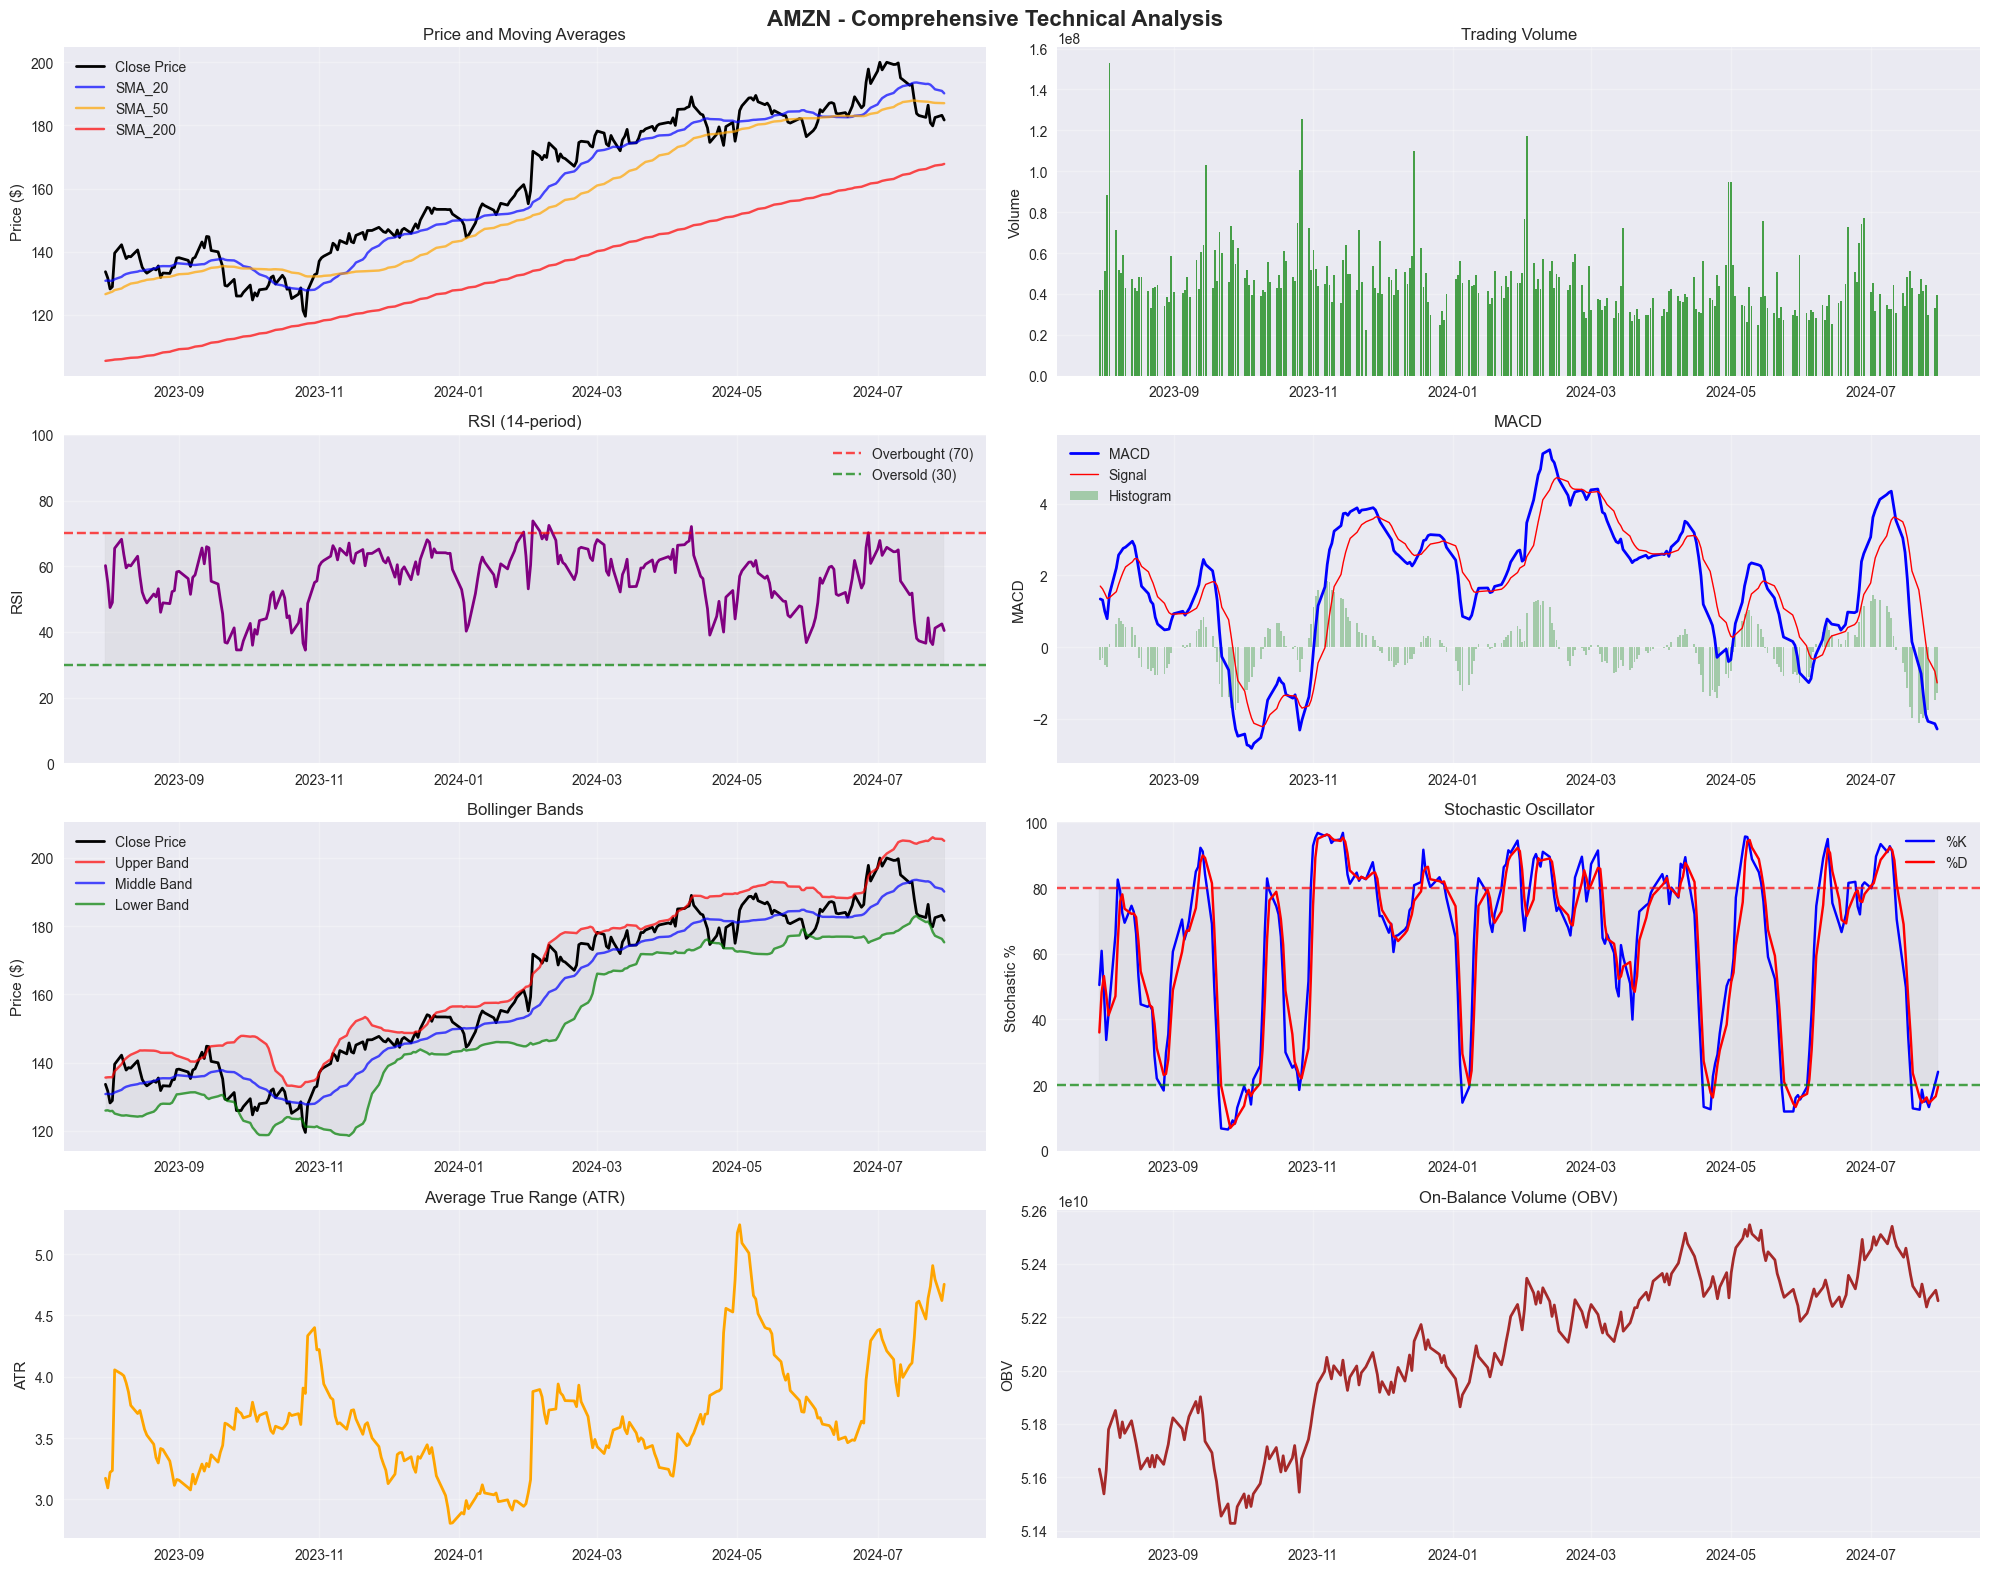


COMPREHENSIVE ANALYSIS SUMMARY - GOOGL

 Calculating financial metrics for GOOGL...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $171.86
   Volume (Last Day): 13,681,400.0
   Price Change (1Y): 29.11%

 TECHNICAL INDICATORS:
   RSI (14): 37.92
   MACD: -2.7081
   MACD Signal: -0.6533

 RISK METRICS:
   Volatility (Annualized): 30.67%
   Sharpe Ratio: 0.78
   Maximum Drawdown: -65.29%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum

📊 Creating visualizations for GOOGL...


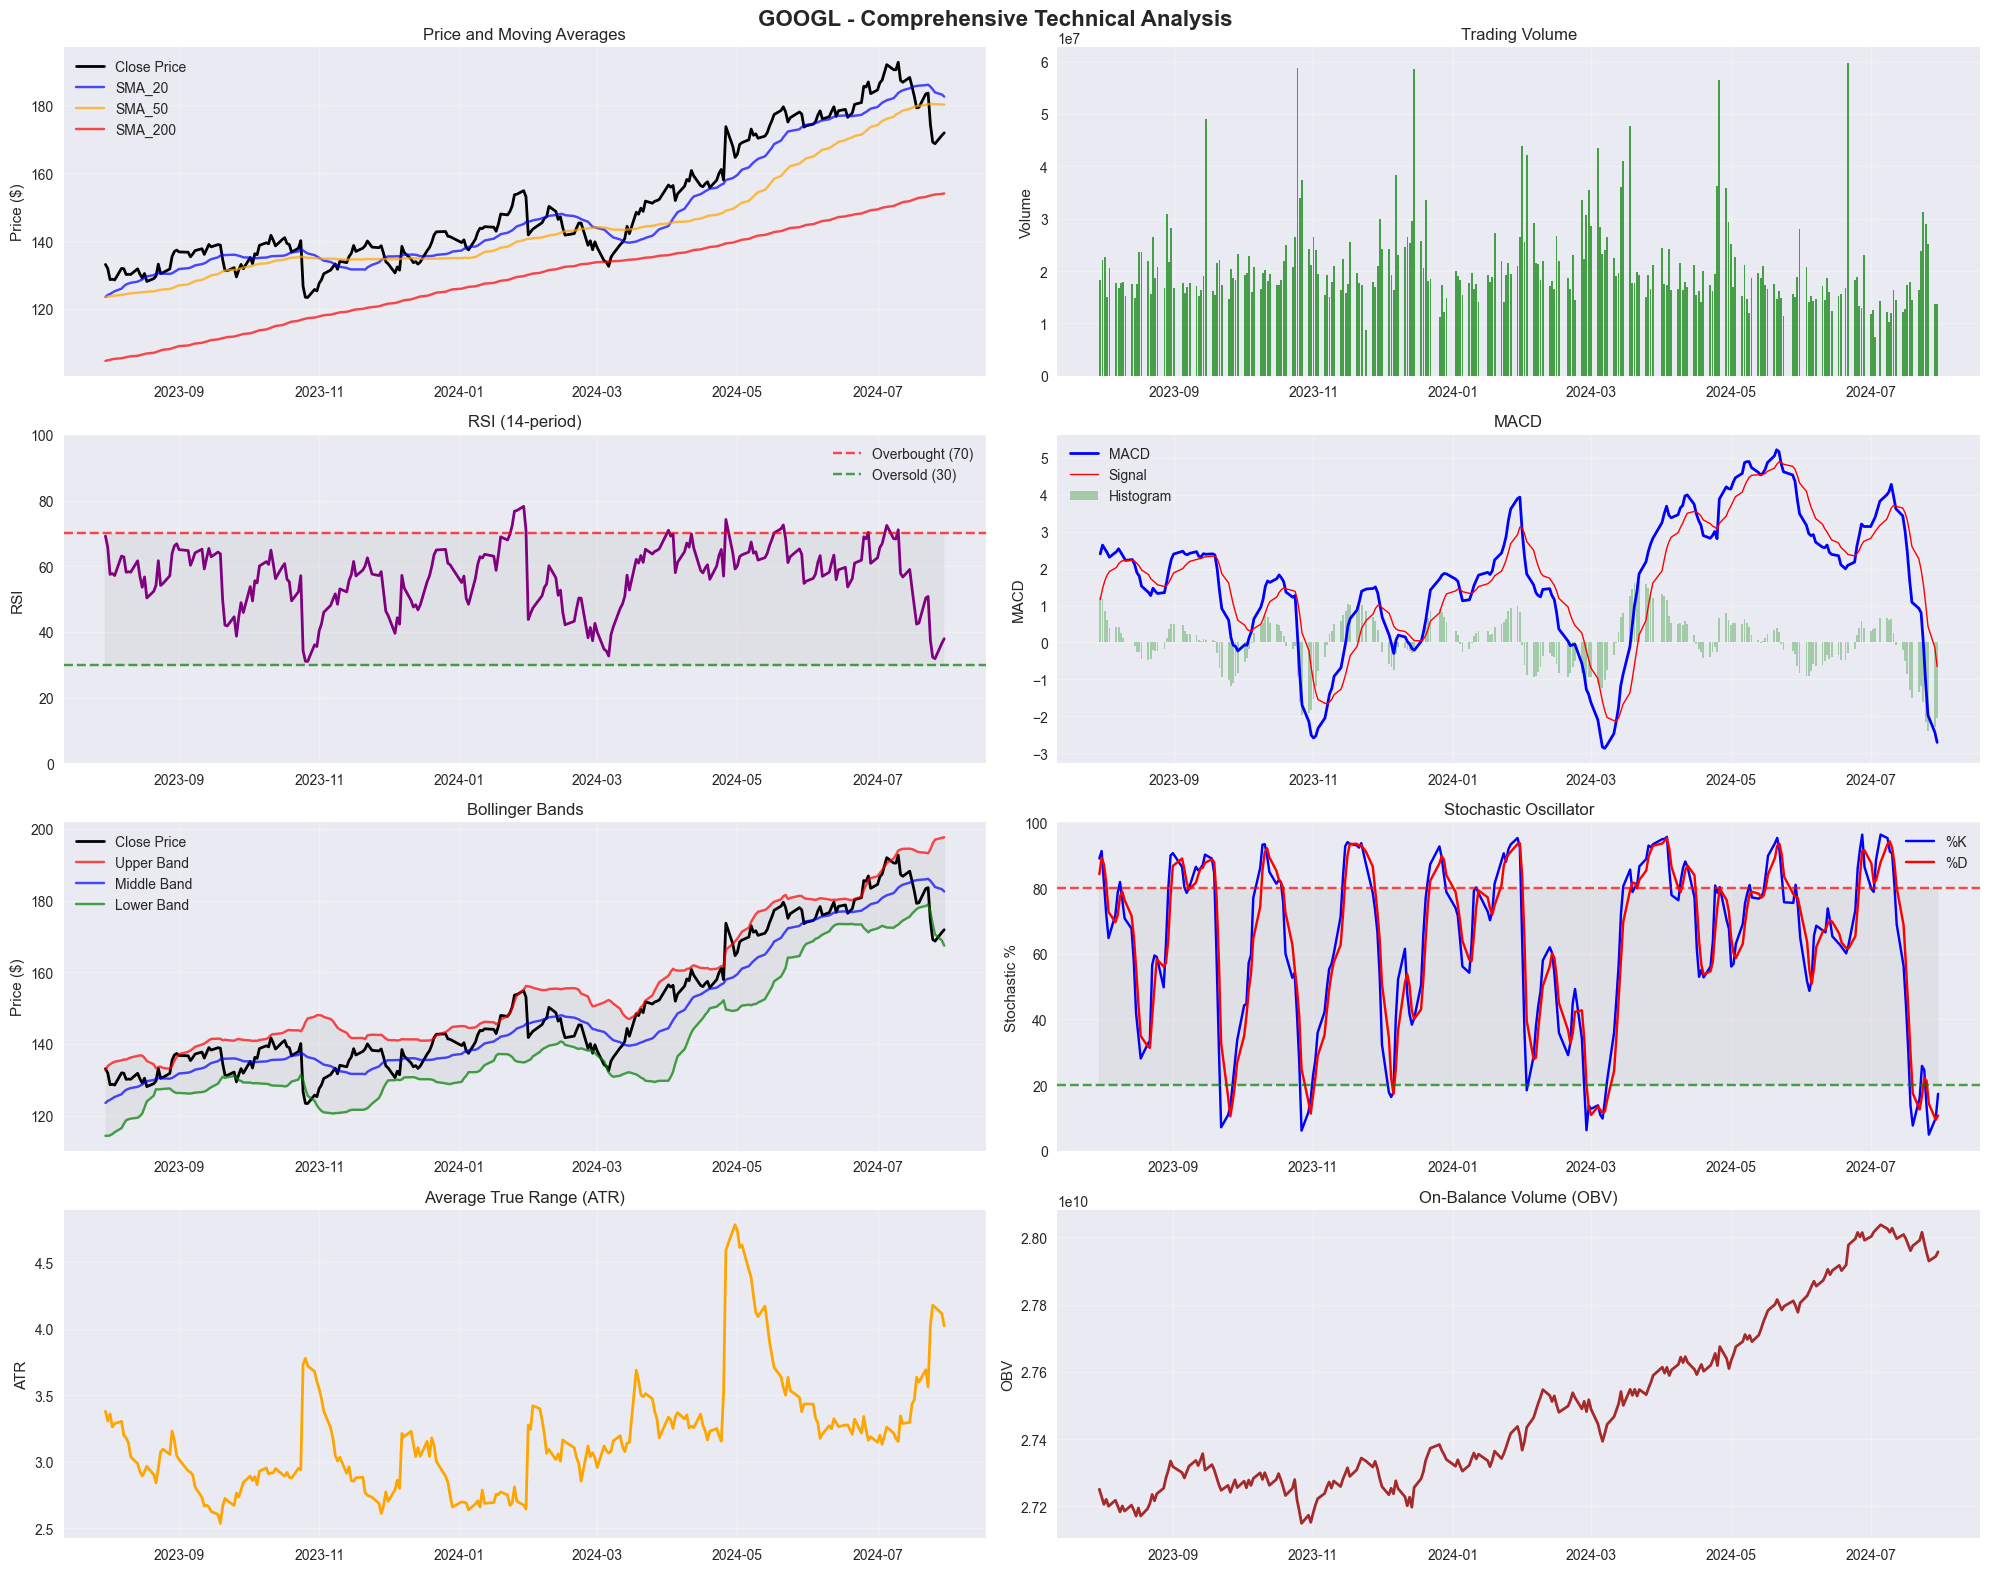


COMPREHENSIVE ANALYSIS SUMMARY - META

 Calculating financial metrics for META...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $463.19
   Volume (Last Day): 11,390,400.0
   Price Change (1Y): 45.38%

 TECHNICAL INDICATORS:
   RSI (14): 39.79
   MACD: -10.3579
   MACD Signal: -6.3010

 RISK METRICS:
   Volatility (Annualized): 38.54%
   Sharpe Ratio: 0.77
   Maximum Drawdown: -76.74%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum

📊 Creating visualizations for META...


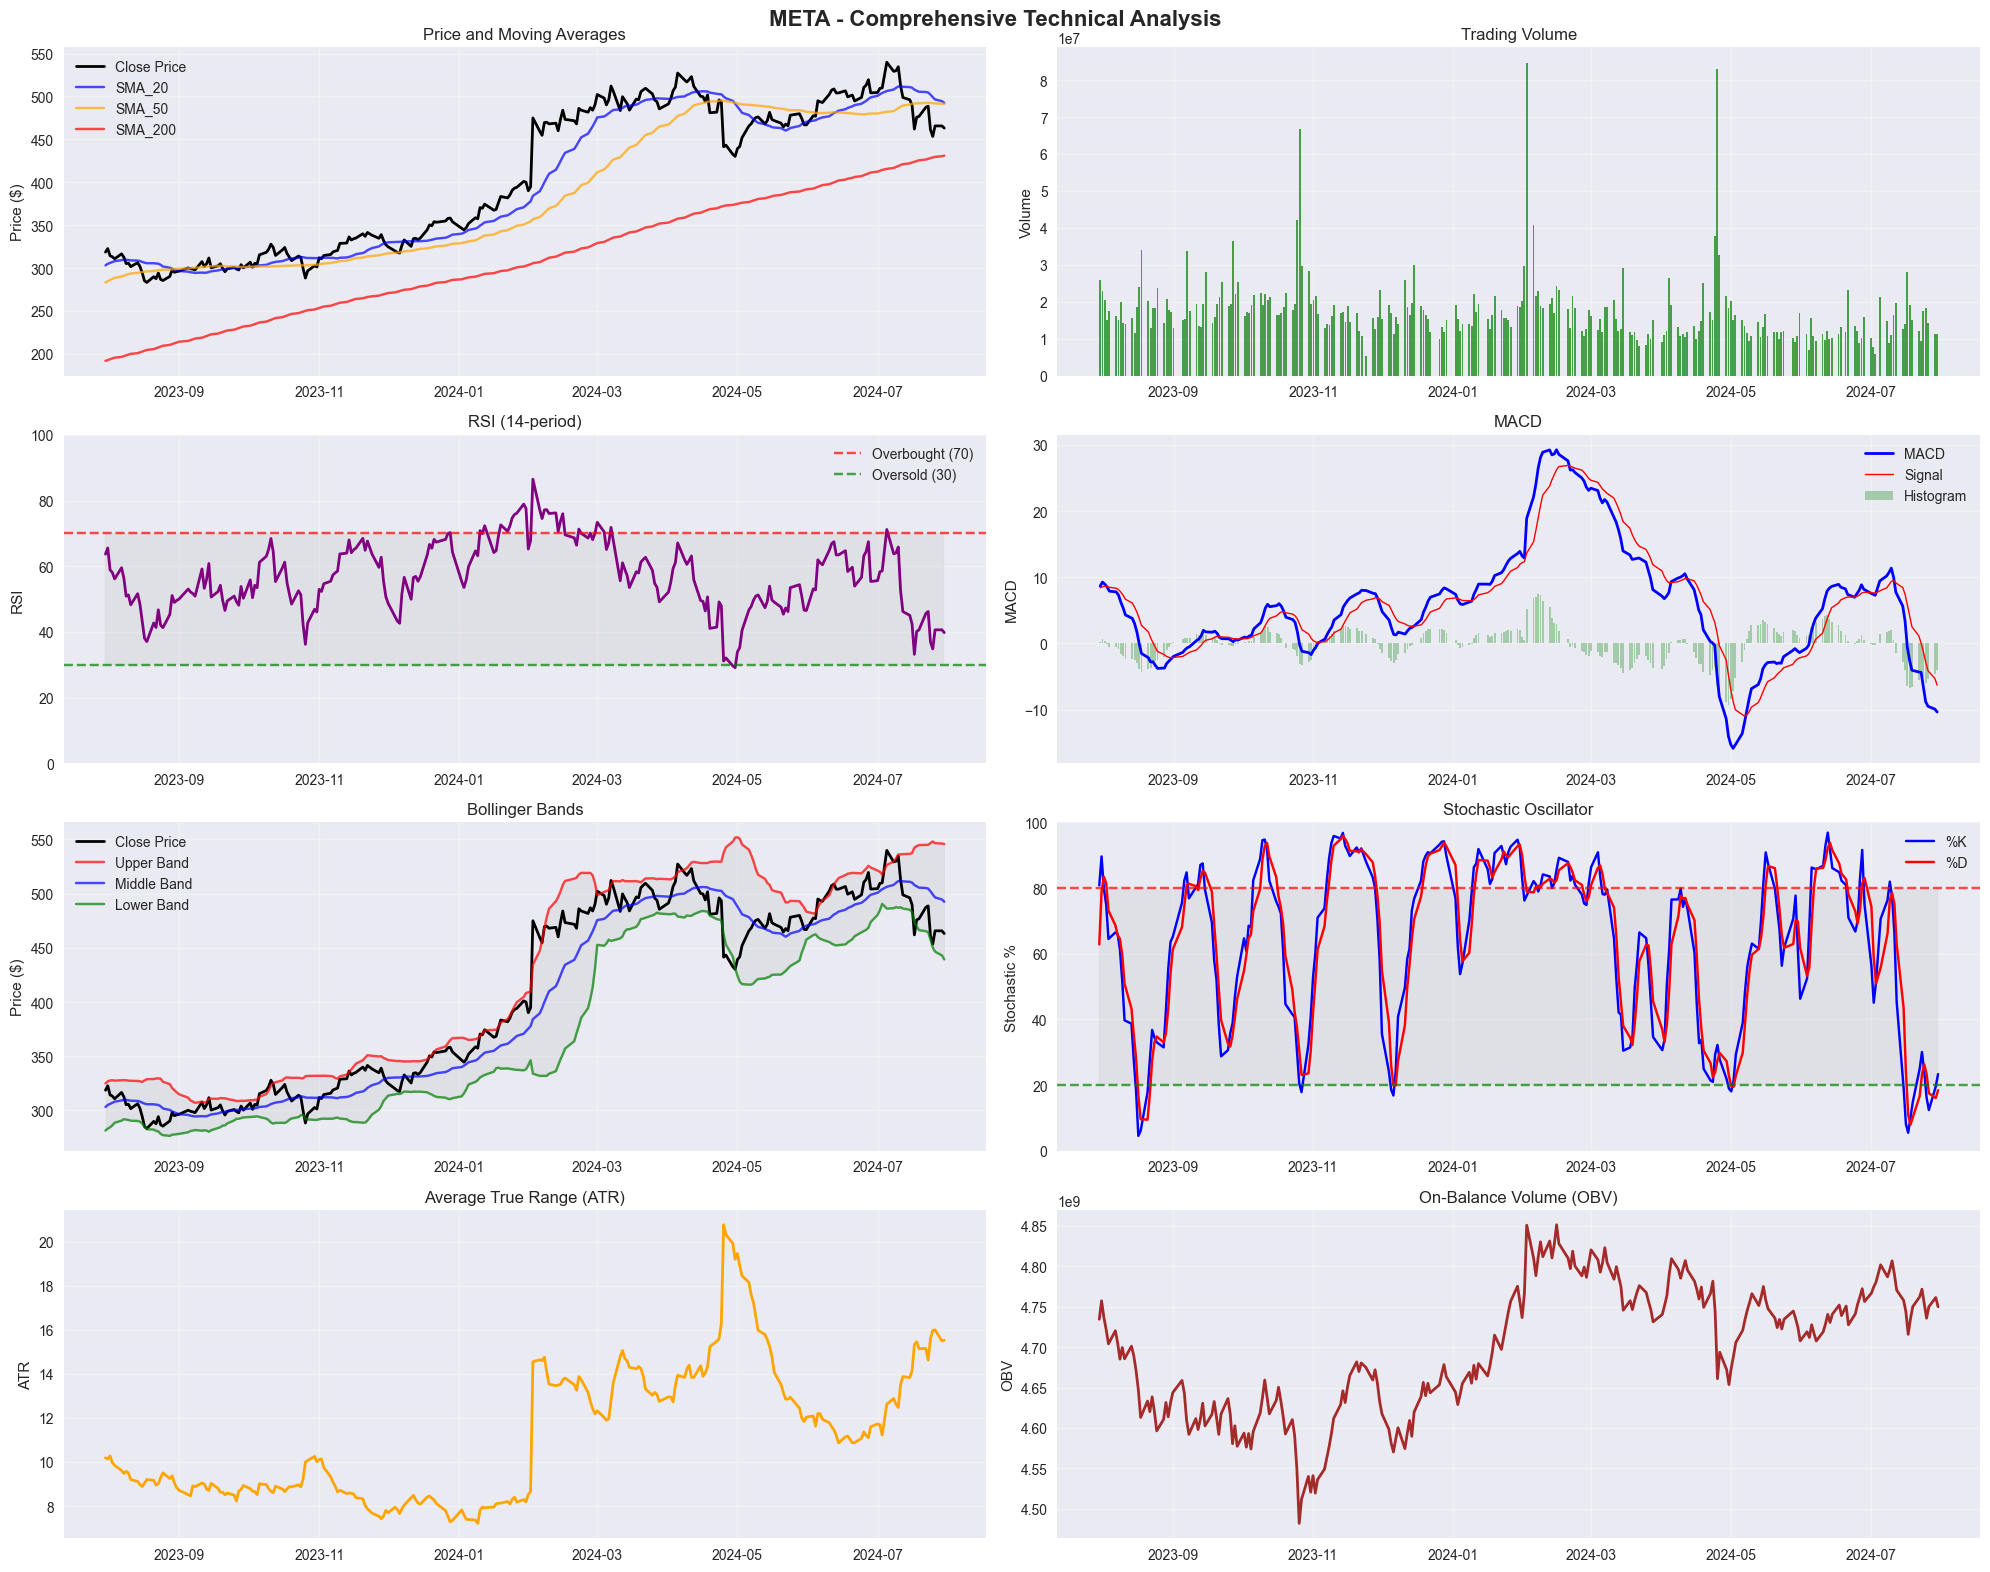


COMPREHENSIVE ANALYSIS SUMMARY - MSFT

 Calculating financial metrics for MSFT...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $422.92
   Volume (Last Day): 32,687,600.0
   Price Change (1Y): 25.90%

 TECHNICAL INDICATORS:
   RSI (14): 37.08
   MACD: -5.1816
   MACD Signal: -1.2726

 RISK METRICS:
   Volatility (Annualized): 33.54%
   Sharpe Ratio: 0.76
   Maximum Drawdown: -74.56%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum

📊 Creating visualizations for MSFT...


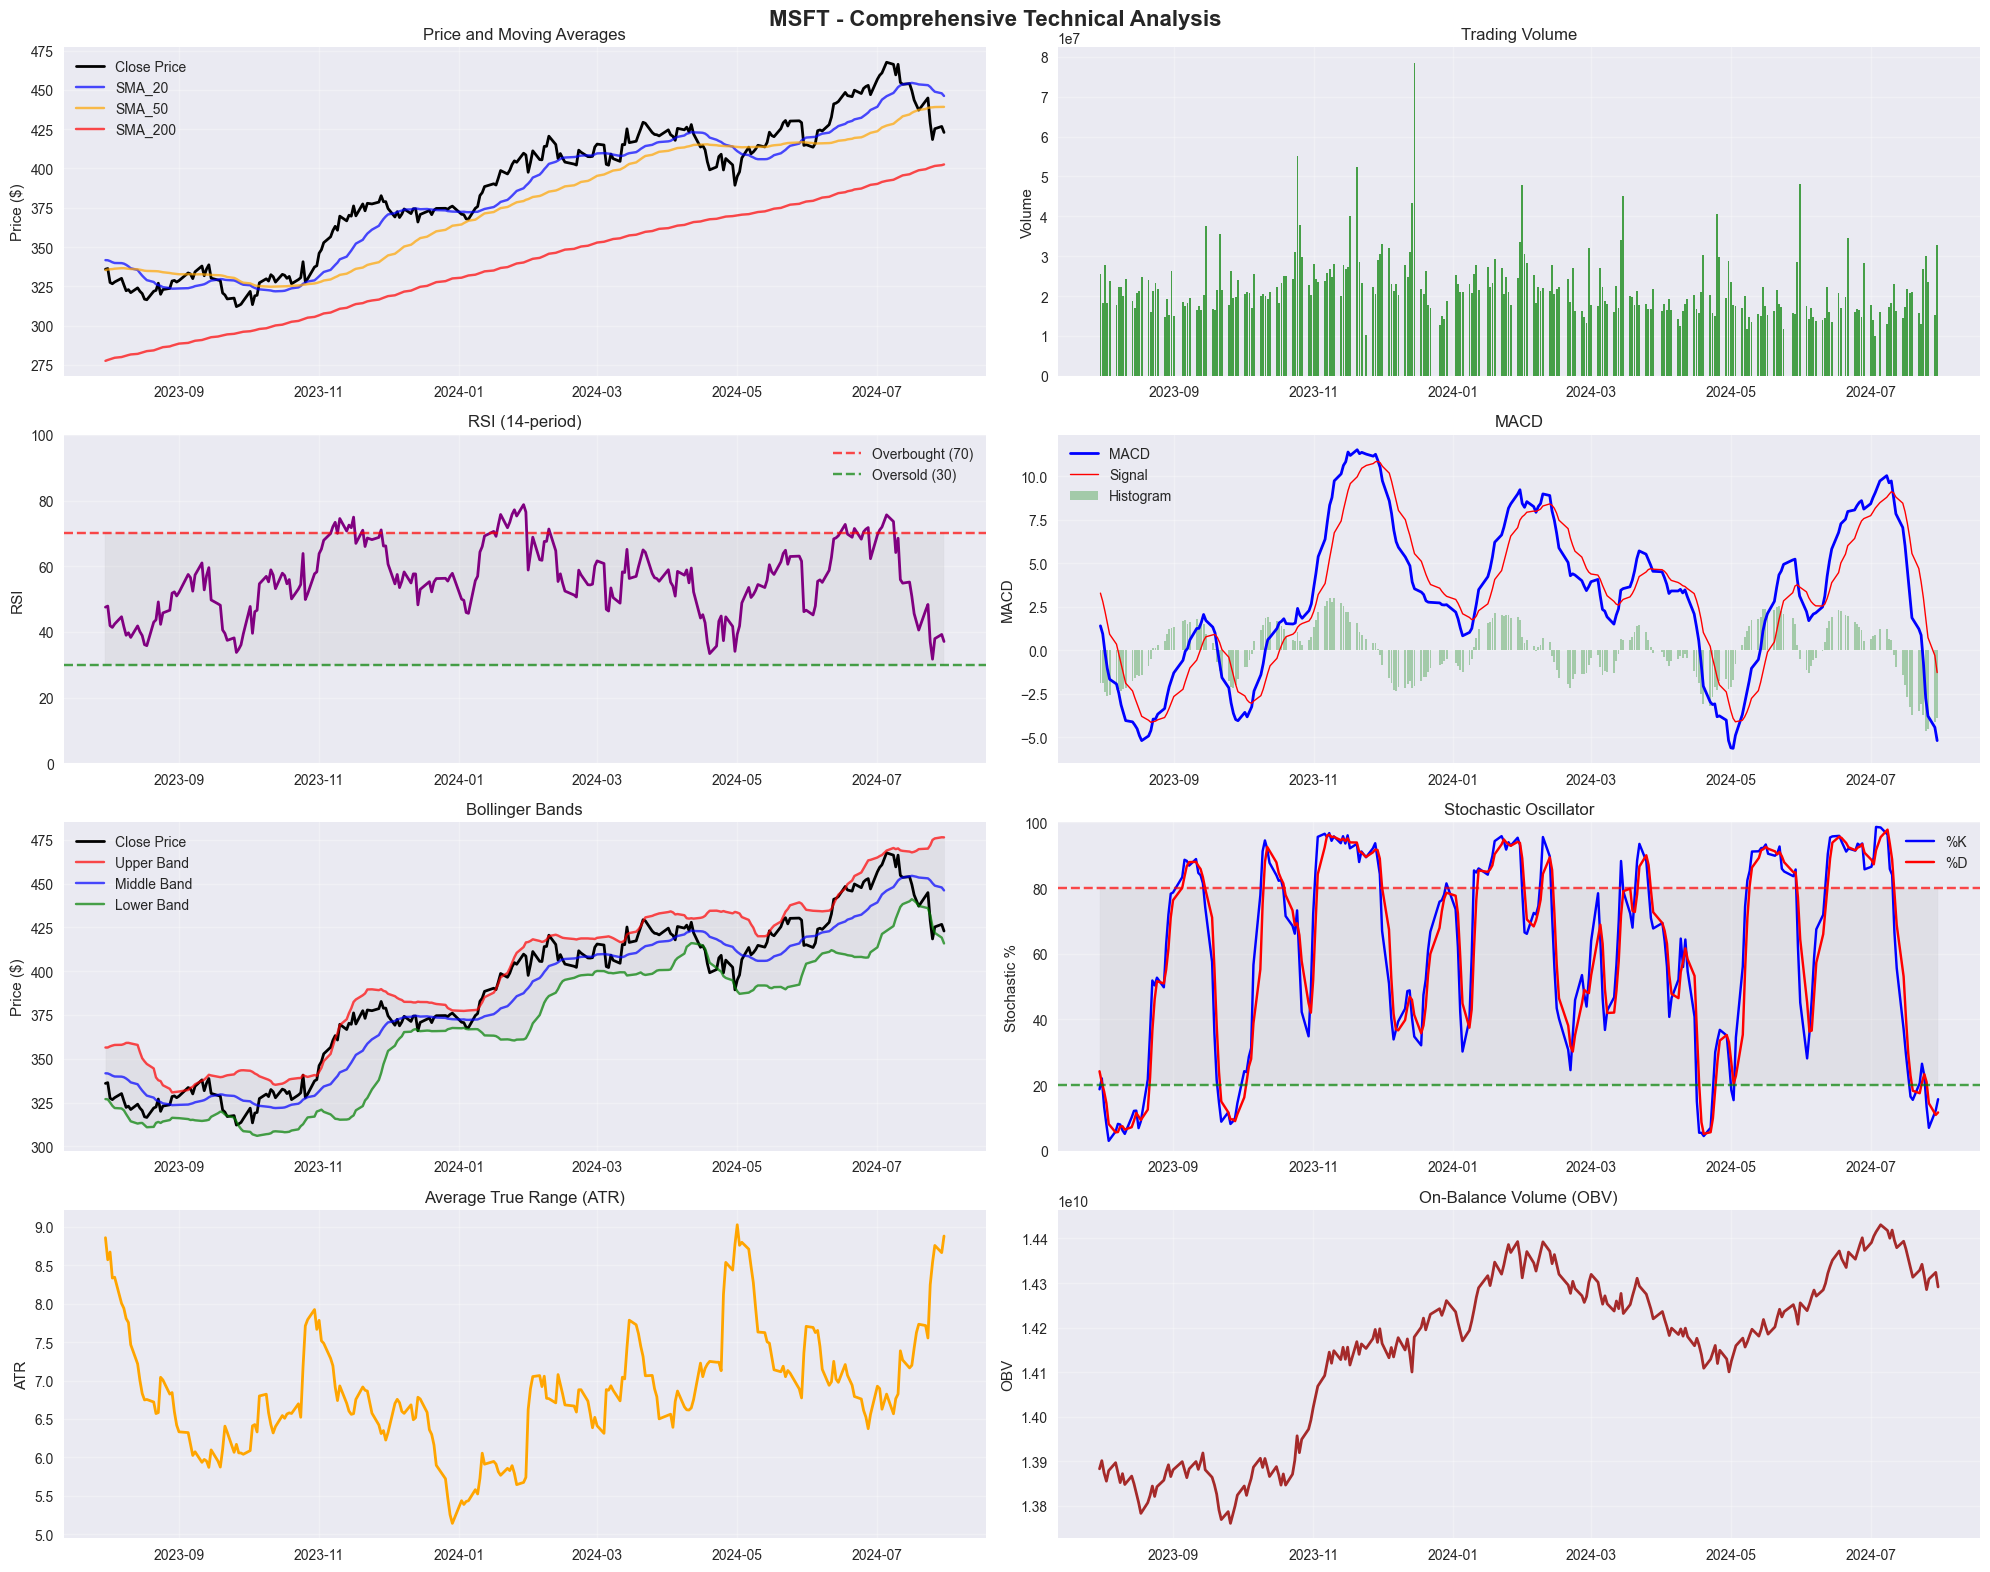


COMPREHENSIVE ANALYSIS SUMMARY - NVDA

 Calculating financial metrics for NVDA...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $103.73
   Volume (Last Day): 486,833,300.0
   Price Change (1Y): 121.98%

 TECHNICAL INDICATORS:
   RSI (14): 33.35
   MACD: -2.9541
   MACD Signal: -0.3894

 RISK METRICS:
   Volatility (Annualized): 60.11%
   Sharpe Ratio: 0.78
   Maximum Drawdown: -89.72%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum

📊 Creating visualizations for NVDA...


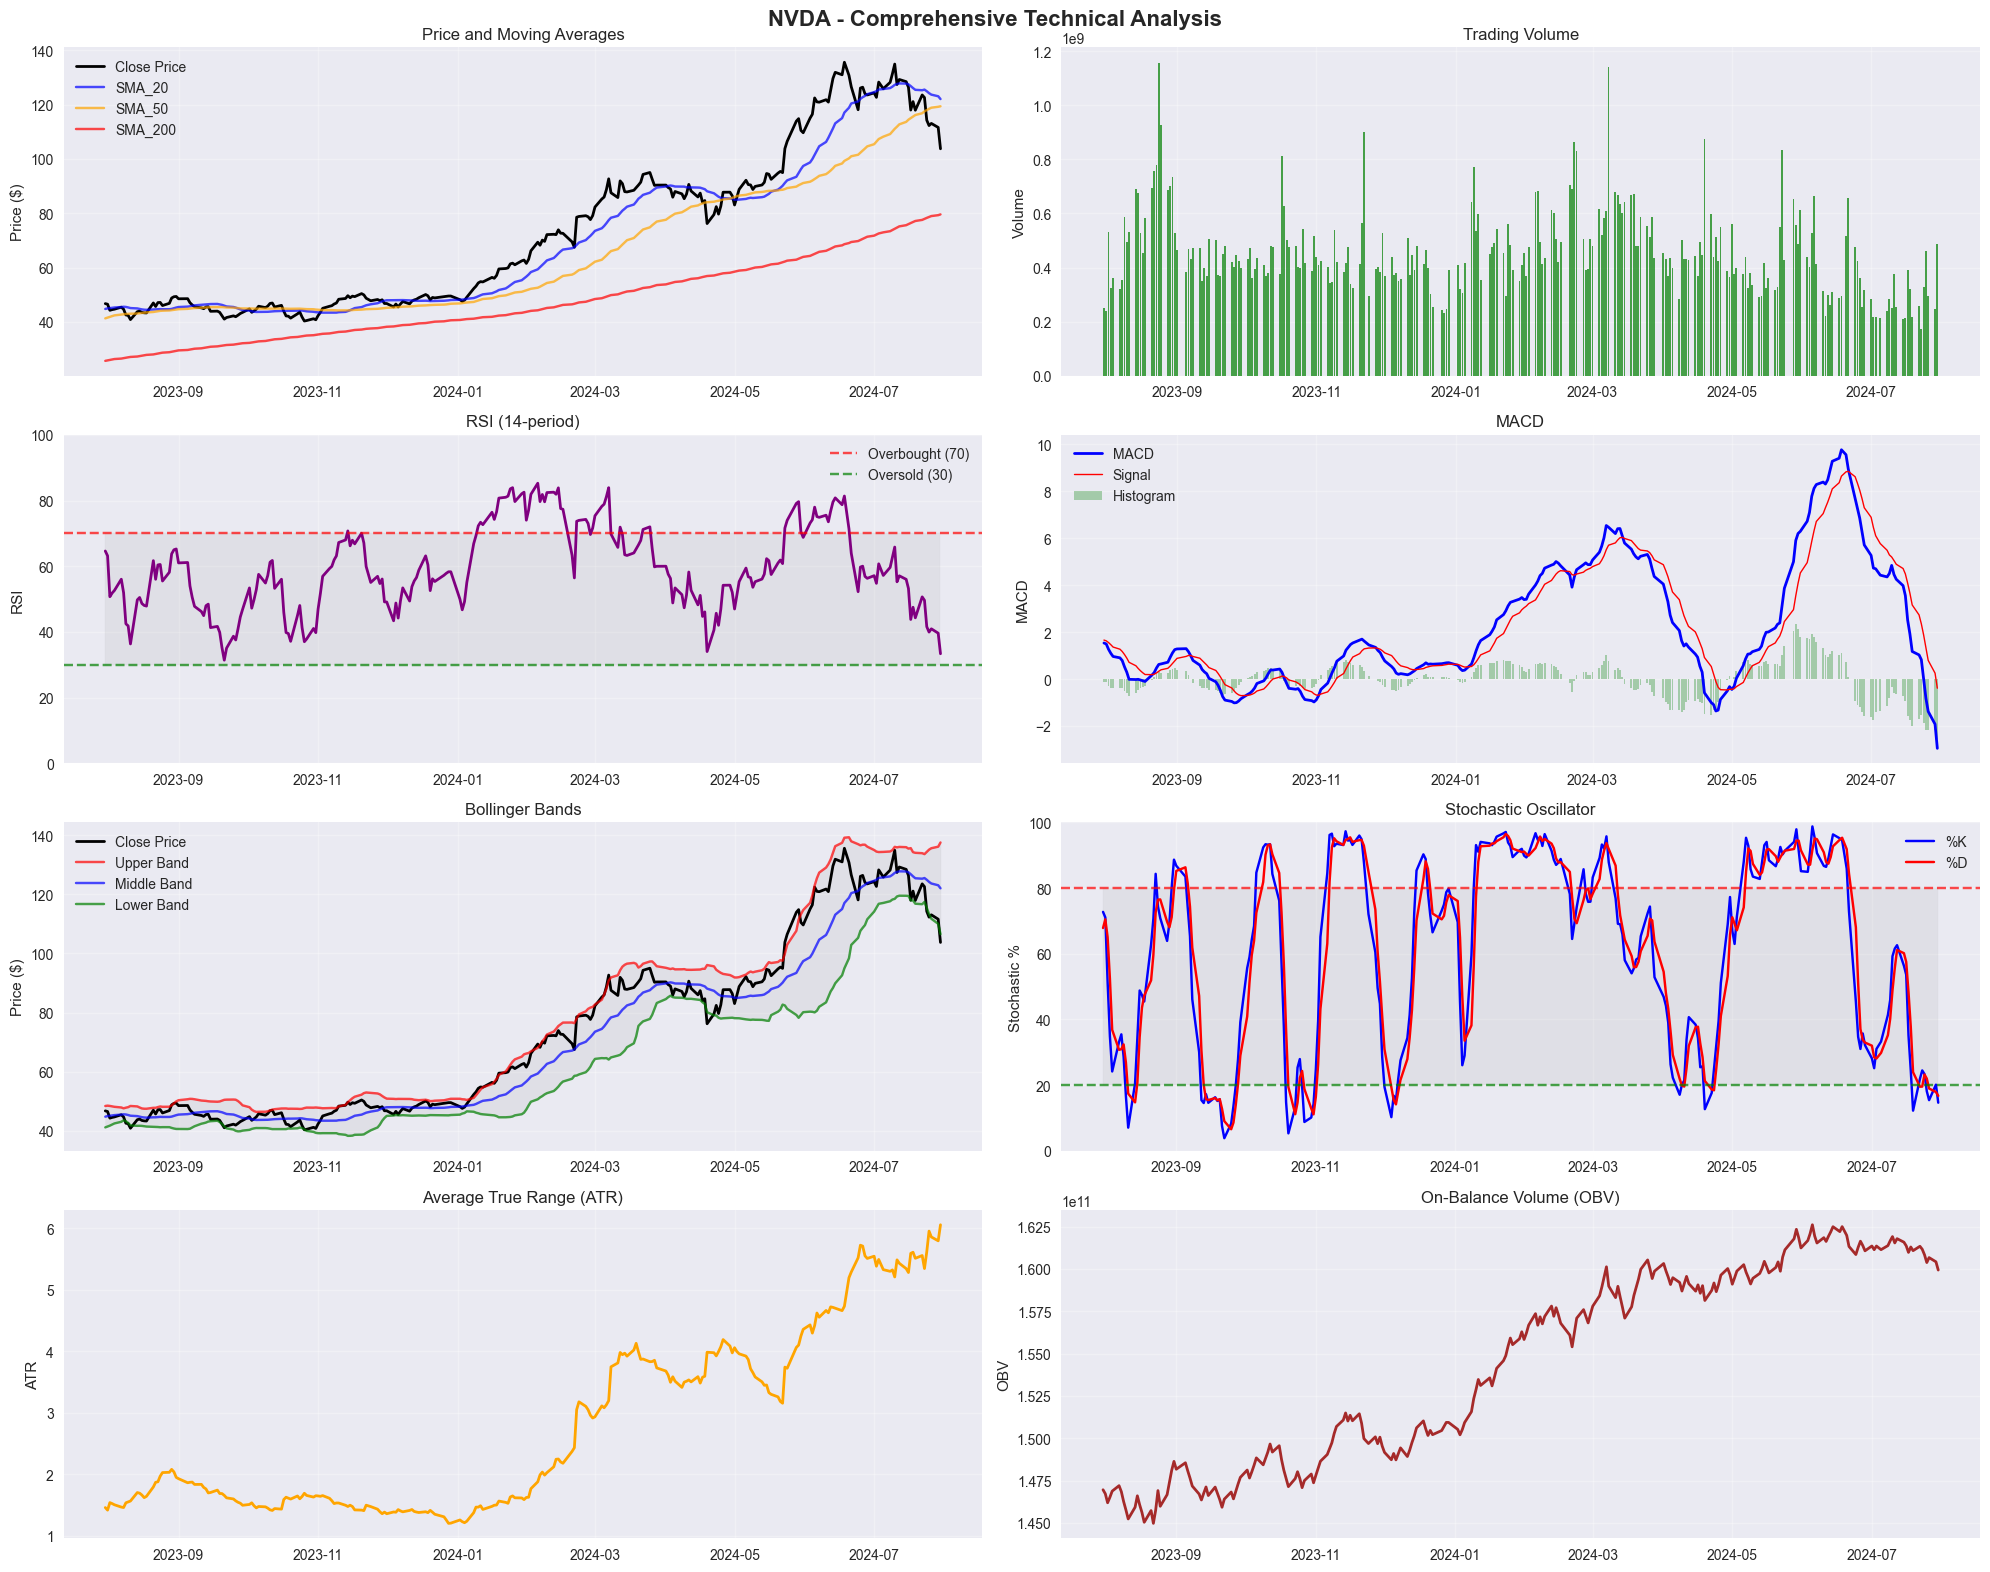


COMPREHENSIVE ANALYSIS SUMMARY - TSLA

 Calculating financial metrics for TSLA...
Financial metrics calculated successfully!

 CURRENT MARKET DATA:
   Current Price: $222.62
   Volume (Last Day): 100,560,300.0
   Price Change (1Y): -16.76%

 TECHNICAL INDICATORS:
   RSI (14): 48.22
   MACD: 5.2062
   MACD Signal: 10.4905

 RISK METRICS:
   Volatility (Annualized): 56.94%
   Sharpe Ratio: 0.87
   Maximum Drawdown: -73.63%
   Beta: 1.00

 TRADING SIGNALS:
   🔴 MACD below signal line - Bearish momentum
   🟢 Price above SMA50 and SMA200 - Strong uptrend

📊 Creating visualizations for TSLA...


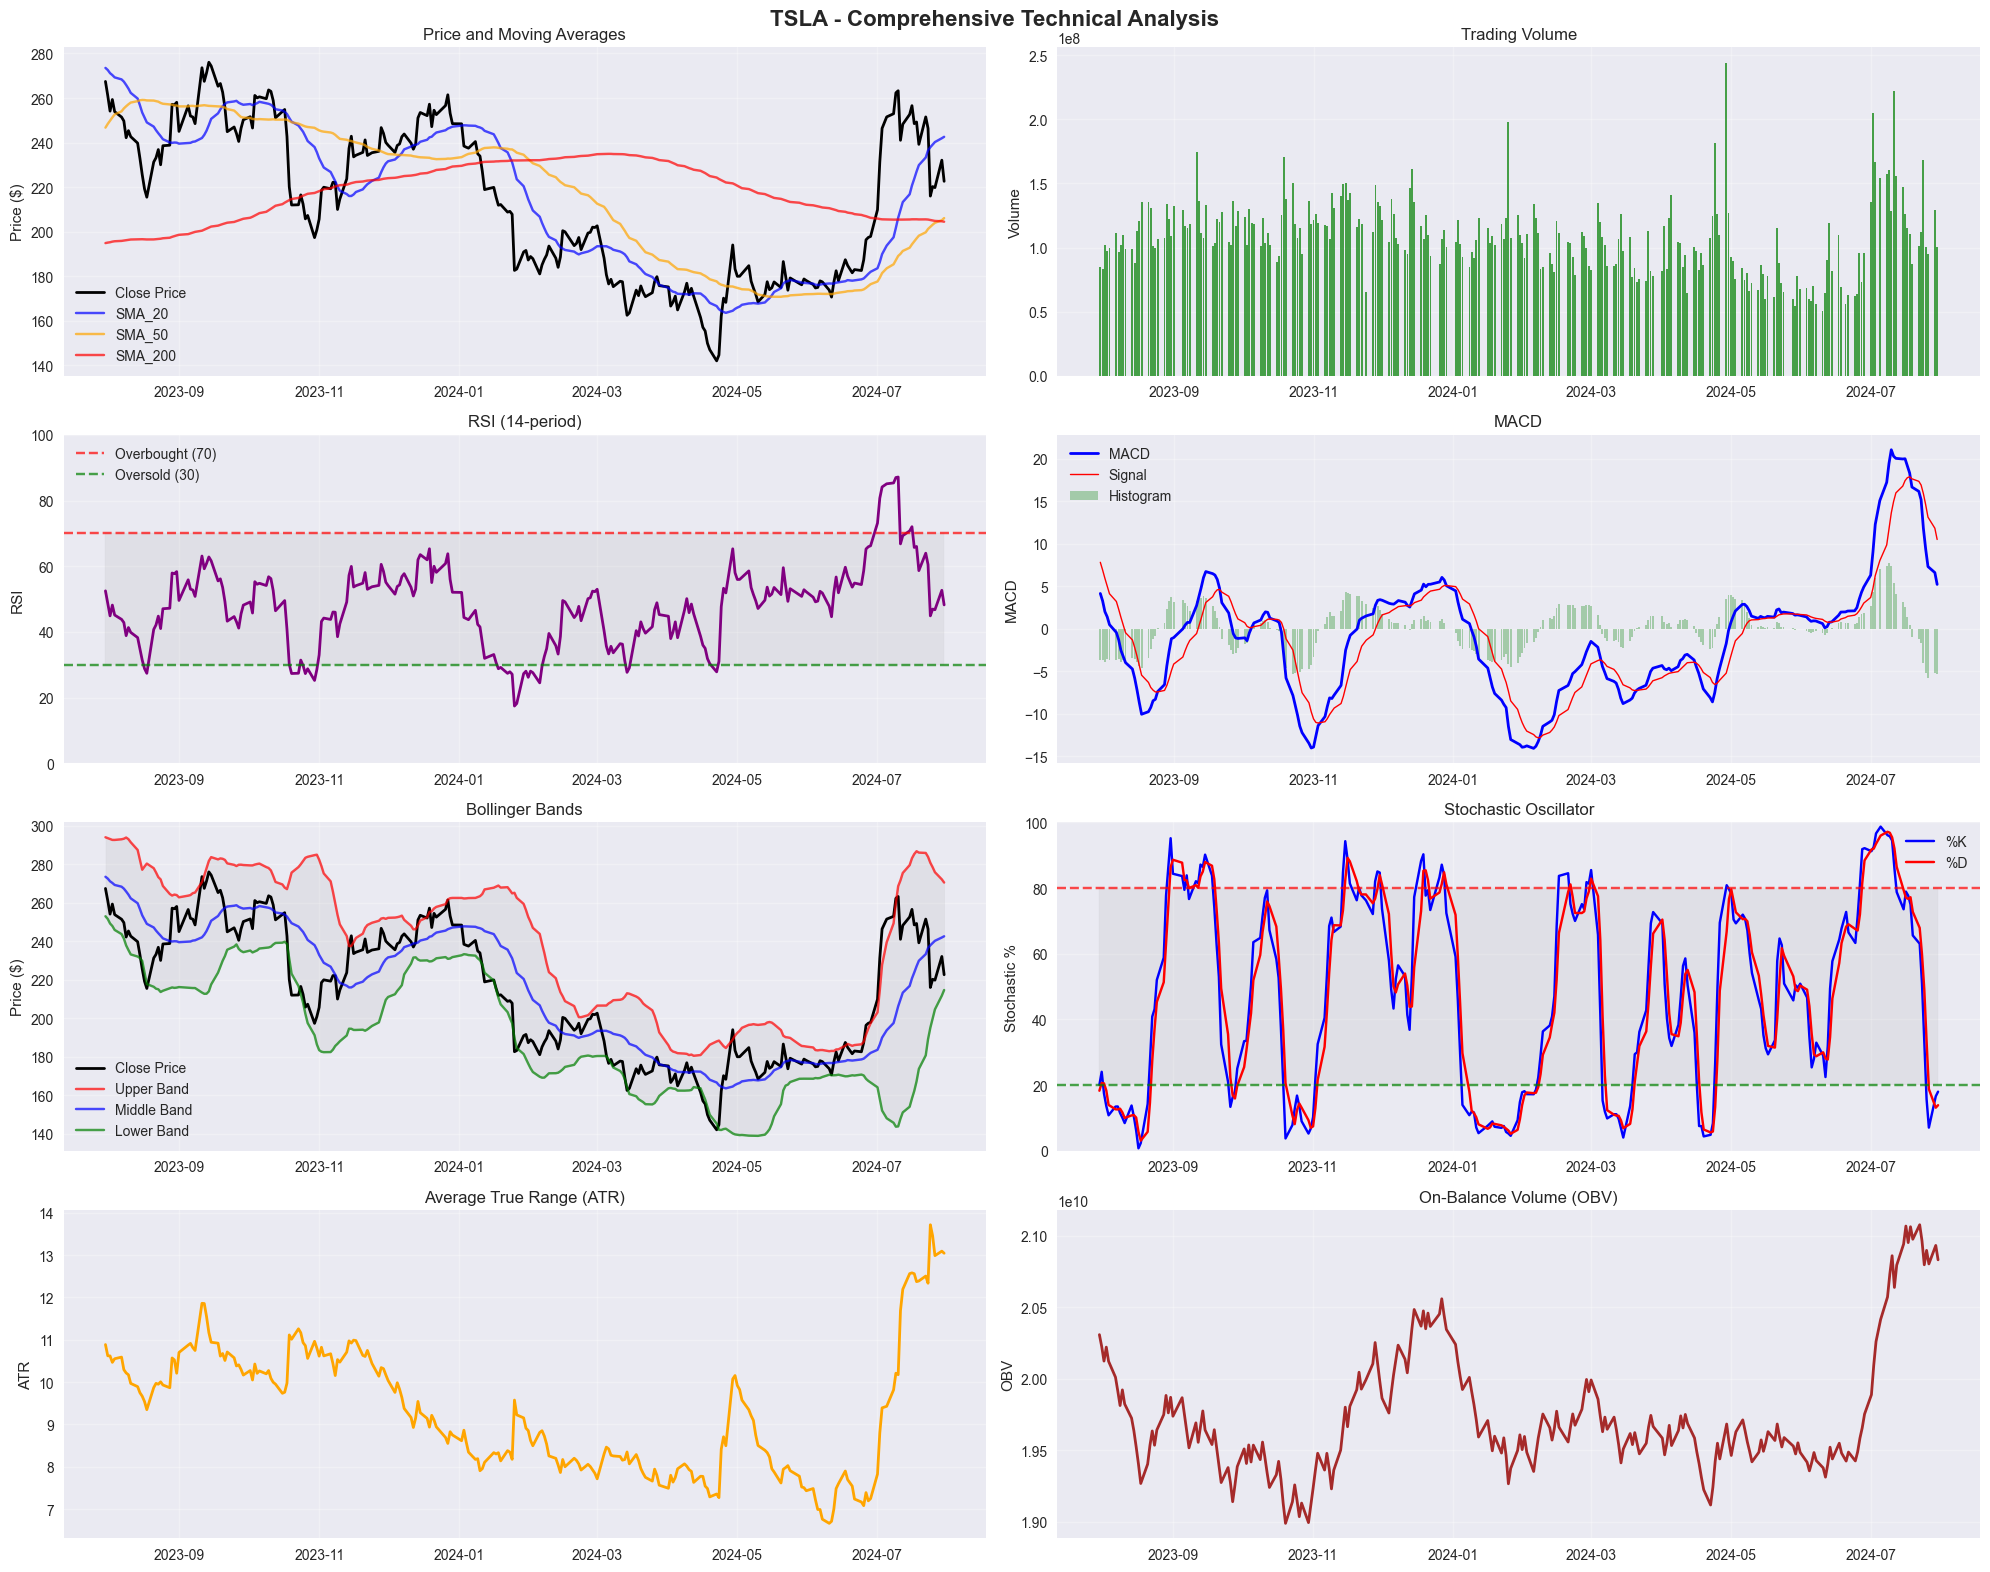


 Analysis complete! Check the generated visualizations and summaries above.


In [4]:


class StockAnalyzer:

    def __init__(self, file_path, stock_symbol):

        self.stock_symbol = stock_symbol
        self.data = self.load_and_prepare_data(file_path)
        self.indicators = {}
        
    def load_and_prepare_data(self, file_path):
        try:
           
            df = pd.read_csv(file_path)
            
           
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            df.sort_index(inplace=True)
            
            df.dropna(inplace=True)
            
            numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
            for col in numeric_columns:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce').astype(np.float64)
            
            # Remove any rows with missing values
            df.dropna(inplace=True)
            
            # Ensure we have minimum required data points
            if len(df) < 200:
                print(f"⚠️  Warning: Only {len(df)} data points available for {self.stock_symbol}. Some indicators may not be reliable.")
            
            print(f"✅ Successfully loaded {len(df)} records for {self.stock_symbol}")
            print(f"📅 Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
            
            return df
            
        except Exception as e:
            print(f"❌ Error loading data: {str(e)}")
            return None
    
    def calculate_technical_indicators(self):
        if self.data is None:
            print("No data available for analysis")
            return
        
        print(f"\n Calculating technical indicators for {self.stock_symbol}...")
        
        high = self.data['High'].astype(np.float64).values
        low = self.data['Low'].astype(np.float64).values
        close = self.data['Close'].astype(np.float64).values
        volume = self.data['Volume'].astype(np.float64).values
        open_price = self.data['Open'].astype(np.float64).values
        
        # Moving Averages
        try:
            self.indicators['SMA_20'] = talib.SMA(close, timeperiod=20)
            self.indicators['SMA_50'] = talib.SMA(close, timeperiod=50)
            self.indicators['SMA_200'] = talib.SMA(close, timeperiod=200)
            self.indicators['EMA_12'] = talib.EMA(close, timeperiod=12)
            self.indicators['EMA_26'] = talib.EMA(close, timeperiod=26)
        except Exception as e:
            print(f"⚠️ Error calculating moving averages: {e}")
        
        # RSI (Relative Strength Index)
        try:
            self.indicators['RSI_14'] = talib.RSI(close, timeperiod=14)
        except Exception as e:
            print(f"⚠️ Error calculating RSI: {e}")
        
        # MACD (Moving Average Convergence Divergence)
        try:
            macd, macd_signal, macd_hist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
            self.indicators['MACD'] = macd
            self.indicators['MACD_Signal'] = macd_signal
            self.indicators['MACD_Histogram'] = macd_hist
        except Exception as e:
            print(f"⚠️ Error calculating MACD: {e}")
        
        # Bollinger Bands
        try:
            bb_upper, bb_middle, bb_lower = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
            self.indicators['BB_Upper'] = bb_upper
            self.indicators['BB_Middle'] = bb_middle
            self.indicators['BB_Lower'] = bb_lower
        except Exception as e:
            print(f"⚠️ Error calculating Bollinger Bands: {e}")
        
        # Stochastic Oscillator
        try:
            slowk, slowd = talib.STOCH(high, low, close, fastk_period=14, slowk_period=3, slowd_period=3)
            self.indicators['Stoch_K'] = slowk
            self.indicators['Stoch_D'] = slowd
        except Exception as e:
            print(f"⚠️ Error calculating Stochastic: {e}")
        
        # Average True Range (ATR)
        try:
            self.indicators['ATR'] = talib.ATR(high, low, close, timeperiod=14)
        except Exception as e:
            print(f"⚠️ Error calculating ATR: {e}")
        
        # Williams %R
        try:
            self.indicators['Williams_R'] = talib.WILLR(high, low, close, timeperiod=14)
        except Exception as e:
            print(f"⚠️ Error calculating Williams %R: {e}")
        
        # Commodity Channel Index (CCI)
        try:
            self.indicators['CCI'] = talib.CCI(high, low, close, timeperiod=14)
        except Exception as e:
            print(f"⚠️ Error calculating CCI: {e}")
        
        # Volume indicators
        try:
            self.indicators['OBV'] = talib.OBV(close, volume)
            self.indicators['AD'] = talib.AD(high, low, close, volume)
        except Exception as e:
            print(f"⚠️ Error calculating volume indicators: {e}")
            # Create dummy arrays filled with NaN if volume indicators fail
            self.indicators['OBV'] = np.full_like(close, np.nan)
            self.indicators['AD'] = np.full_like(close, np.nan)
        
        print("Technical indicators calculated successfully!")
        
    def calculate_financial_metrics(self):
        if self.data is None:
            return {}
        
        print(f"\n Calculating financial metrics for {self.stock_symbol}...")
        
        close_prices = self.data['Close']
        
        daily_returns = close_prices.pct_change().dropna()
        
        volatility = daily_returns.std() * np.sqrt(252)
        
        risk_free_rate = 0.02
        excess_returns = daily_returns.mean() * 252 - risk_free_rate
        sharpe_ratio = excess_returns / volatility if volatility != 0 else 0
        
        rolling_max = close_prices.expanding().max()
        drawdown = (close_prices - rolling_max) / rolling_max
        max_drawdown = drawdown.min()
        
        market_returns = daily_returns 
        beta = np.cov(daily_returns.dropna(), market_returns.dropna())[0,1] / np.var(market_returns.dropna())
        
        price_momentum_1m = (close_prices.iloc[-1] - close_prices.iloc[-21]) / close_prices.iloc[-21] if len(close_prices) > 21 else 0
        price_momentum_3m = (close_prices.iloc[-1] - close_prices.iloc[-63]) / close_prices.iloc[-63] if len(close_prices) > 63 else 0
        
        metrics = {
            'Current_Price': close_prices.iloc[-1],
            'Price_Change_1Y': ((close_prices.iloc[-1] - close_prices.iloc[-252]) / close_prices.iloc[-252]) * 100 if len(close_prices) > 252 else np.nan,
            'Volatility_Annualized': volatility * 100,
            'Sharpe_Ratio': sharpe_ratio,
            'Max_Drawdown': max_drawdown * 100,
            'Beta': beta,
            'Price_Momentum_1M': price_momentum_1m * 100,
            'Price_Momentum_3M': price_momentum_3m * 100,
            'Average_Volume': self.data['Volume'].mean(),
            'Price_to_SMA200_Ratio': (close_prices.iloc[-1] / self.indicators['SMA_200'][-1]) if not np.isnan(self.indicators['SMA_200'][-1]) else np.nan
        }
        
        print("Financial metrics calculated successfully!")
        return metrics
    
    def generate_trading_signals(self):
        if not self.indicators:
            print("No indicators calculated. Run calculate_technical_indicators() first.")
            return
        
        signals = []
        
        current_rsi = self.indicators['RSI_14'][-1] if not np.isnan(self.indicators['RSI_14'][-1]) else 50
        if current_rsi < 30:
            signals.append("🟢 RSI Oversold - Potential BUY signal")
        elif current_rsi > 70:
            signals.append("🔴 RSI Overbought - Potential SELL signal")
        
        # MACD signals
        current_macd = self.indicators['MACD'][-1] if not np.isnan(self.indicators['MACD'][-1]) else 0
        current_signal = self.indicators['MACD_Signal'][-1] if not np.isnan(self.indicators['MACD_Signal'][-1]) else 0
        
        if current_macd > current_signal:
            signals.append("🟢 MACD above signal line - Bullish momentum")
        else:
            signals.append("🔴 MACD below signal line - Bearish momentum")
        
        # Moving Average signals
        current_price = self.data['Close'].iloc[-1]
        sma_50 = self.indicators['SMA_50'][-1] if not np.isnan(self.indicators['SMA_50'][-1]) else current_price
        sma_200 = self.indicators['SMA_200'][-1] if not np.isnan(self.indicators['SMA_200'][-1]) else current_price
        
        if current_price > sma_50 > sma_200:
            signals.append("🟢 Price above SMA50 and SMA200 - Strong uptrend")
        elif current_price < sma_50 < sma_200:
            signals.append("🔴 Price below SMA50 and SMA200 - Strong downtrend")
        
        return signals
    
    def create_comprehensive_visualization(self):
        if self.data is None or not self.indicators:
            print("No data or indicators available for visualization")
            return
        
        # Create subplots
        fig, axes = plt.subplots(4, 2, figsize=(20, 16))
        fig.suptitle(f'{self.stock_symbol} - Comprehensive Technical Analysis', fontsize=16, fontweight='bold')
        
        # Get recent data for better visualization (last 252 trading days = ~1 year)
        recent_data = self.data.tail(min(252, len(self.data)))
        recent_dates = recent_data.index
        
        # 1. Price and Moving Averages
        ax1 = axes[0, 0]
        ax1.plot(recent_dates, recent_data['Close'], label='Close Price', linewidth=2, color='black')
        
        # Add moving averages if they exist
        for ma_period, color in [('SMA_20', 'blue'), ('SMA_50', 'orange'), ('SMA_200', 'red')]:
            if ma_period in self.indicators:
                ma_data = self.indicators[ma_period][-len(recent_data):]
                ax1.plot(recent_dates, ma_data, label=ma_period, color=color, alpha=0.7)
        
        ax1.set_title('Price and Moving Averages')
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Volume
        ax2 = axes[0, 1]
        ax2.bar(recent_dates, recent_data['Volume'], alpha=0.7, color='green')
        ax2.set_title('Trading Volume')
        ax2.set_ylabel('Volume')
        ax2.grid(True, alpha=0.3)
        
        # 3. RSI
        ax3 = axes[1, 0]
        rsi_data = self.indicators['RSI_14'][-len(recent_data):]
        ax3.plot(recent_dates, rsi_data, color='purple', linewidth=2)
        ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
        ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
        ax3.fill_between(recent_dates, 30, 70, alpha=0.1, color='gray')
        ax3.set_title('RSI (14-period)')
        ax3.set_ylabel('RSI')
        ax3.set_ylim(0, 100)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. MACD
        ax4 = axes[1, 1]
        macd_data = self.indicators['MACD'][-len(recent_data):]
        signal_data = self.indicators['MACD_Signal'][-len(recent_data):]
        hist_data = self.indicators['MACD_Histogram'][-len(recent_data):]
        
        ax4.plot(recent_dates, macd_data, label='MACD', color='blue', linewidth=2)
        ax4.plot(recent_dates, signal_data, label='Signal', color='red', linewidth=1)
        ax4.bar(recent_dates, hist_data, label='Histogram', alpha=0.3, color='green')
        ax4.set_title('MACD')
        ax4.set_ylabel('MACD')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # 5. Bollinger Bands
        ax5 = axes[2, 0]
        ax5.plot(recent_dates, recent_data['Close'], label='Close Price', color='black', linewidth=2)
        
        bb_upper_data = self.indicators['BB_Upper'][-len(recent_data):]
        bb_middle_data = self.indicators['BB_Middle'][-len(recent_data):]
        bb_lower_data = self.indicators['BB_Lower'][-len(recent_data):]
        
        ax5.plot(recent_dates, bb_upper_data, label='Upper Band', color='red', alpha=0.7)
        ax5.plot(recent_dates, bb_middle_data, label='Middle Band', color='blue', alpha=0.7)
        ax5.plot(recent_dates, bb_lower_data, label='Lower Band', color='green', alpha=0.7)
        ax5.fill_between(recent_dates, bb_upper_data, bb_lower_data, alpha=0.1, color='gray')
        ax5.set_title('Bollinger Bands')
        ax5.set_ylabel('Price ($)')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # 6. Stochastic Oscillator
        ax6 = axes[2, 1]
        stoch_k_data = self.indicators['Stoch_K'][-len(recent_data):]
        stoch_d_data = self.indicators['Stoch_D'][-len(recent_data):]
        
        ax6.plot(recent_dates, stoch_k_data, label='%K', color='blue')
        ax6.plot(recent_dates, stoch_d_data, label='%D', color='red')
        ax6.axhline(y=80, color='r', linestyle='--', alpha=0.7)
        ax6.axhline(y=20, color='g', linestyle='--', alpha=0.7)
        ax6.fill_between(recent_dates, 20, 80, alpha=0.1, color='gray')
        ax6.set_title('Stochastic Oscillator')
        ax6.set_ylabel('Stochastic %')
        ax6.set_ylim(0, 100)
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        
        # 7. ATR (Average True Range)
        ax7 = axes[3, 0]
        atr_data = self.indicators['ATR'][-len(recent_data):]
        ax7.plot(recent_dates, atr_data, color='orange', linewidth=2)
        ax7.set_title('Average True Range (ATR)')
        ax7.set_ylabel('ATR')
        ax7.grid(True, alpha=0.3)
        
        # 8. On-Balance Volume
        ax8 = axes[3, 1]
        obv_data = self.indicators['OBV'][-len(recent_data):]
        ax8.plot(recent_dates, obv_data, color='brown', linewidth=2)
        ax8.set_title('On-Balance Volume (OBV)')
        ax8.set_ylabel('OBV')
        ax8.grid(True, alpha=0.3)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    def print_analysis_summary(self):
        """
        Print a comprehensive analysis summary
        """
        if self.data is None:
            print("No data available for analysis")
            return
        
        print(f"\n" + "="*60)
        print(f"COMPREHENSIVE ANALYSIS SUMMARY - {self.stock_symbol}")
        print("="*60)
        
        metrics = self.calculate_financial_metrics()
        
        current_price = self.data['Close'].iloc[-1]
        current_rsi = self.indicators.get('RSI_14', [np.nan])[-1]
        current_macd = self.indicators.get('MACD', [np.nan])[-1]
        current_signal = self.indicators.get('MACD_Signal', [np.nan])[-1]
        
        print(f"\n CURRENT MARKET DATA:")
        print(f"   Current Price: ${current_price:.2f}")
        print(f"   Volume (Last Day): {self.data['Volume'].iloc[-1]:,}")
        print(f"   Price Change (1Y): {metrics.get('Price_Change_1Y', 0):.2f}%")
        
        print(f"\n TECHNICAL INDICATORS:")
        print(f"   RSI (14): {current_rsi:.2f}")
        print(f"   MACD: {current_macd:.4f}")
        print(f"   MACD Signal: {current_signal:.4f}")
        
        print(f"\n RISK METRICS:")
        print(f"   Volatility (Annualized): {metrics.get('Volatility_Annualized', 0):.2f}%")
        print(f"   Sharpe Ratio: {metrics.get('Sharpe_Ratio', 0):.2f}")
        print(f"   Maximum Drawdown: {metrics.get('Max_Drawdown', 0):.2f}%")
        print(f"   Beta: {metrics.get('Beta', 0):.2f}")
        
        print(f"\n TRADING SIGNALS:")
        signals = self.generate_trading_signals()
        for signal in signals:
            print(f"   {signal}")
        
        print("="*60)

def analyze_multiple_stocks(stock_files):
    analyzers = {}
    all_metrics = {}
    
    print(" Starting Multi-Stock Analysis...")
    print("="*50)
    
    # Analyze each stock
    for symbol, file_path in stock_files.items():
        print(f"\n Analyzing {symbol}...")
        analyzer = StockAnalyzer(file_path, symbol)
        
        if analyzer.data is not None:
            analyzer.calculate_technical_indicators()
            analyzers[symbol] = analyzer
            all_metrics[symbol] = analyzer.calculate_financial_metrics()
    
    # Create comparative analysis
    if all_metrics:
        print(f"\n" + "="*80)
        print("COMPARATIVE ANALYSIS")
        print("="*80)
        
        comparison_df = pd.DataFrame(all_metrics).T
        comparison_df = comparison_df.round(2)
        
        print("\n Performance Comparison:")
        print(comparison_df[['Current_Price', 'Price_Change_1Y', 'Volatility_Annualized', 'Sharpe_Ratio', 'Max_Drawdown']].to_string())
        
        # Best performers
        if 'Price_Change_1Y' in comparison_df.columns:
            best_performer = comparison_df['Price_Change_1Y'].idxmax()
            worst_performer = comparison_df['Price_Change_1Y'].idxmin()
            print(f"\n Best Performer (1Y): {best_performer} ({comparison_df.loc[best_performer, 'Price_Change_1Y']:.2f}%)")
            print(f" Worst Performer (1Y): {worst_performer} ({comparison_df.loc[worst_performer, 'Price_Change_1Y']:.2f}%)")
        
        # Risk analysis
        if 'Sharpe_Ratio' in comparison_df.columns:
            best_risk_adjusted = comparison_df['Sharpe_Ratio'].idxmax()
            print(f" Best Risk-Adjusted Return: {best_risk_adjusted} (Sharpe: {comparison_df.loc[best_risk_adjusted, 'Sharpe_Ratio']:.2f})")
    
    return analyzers

if __name__ == "__main__":
    stock_files = {
        'AAPL': '../data/yfinance_data/AAPL_historical_data.csv',
        'AMZN': '../data/yfinance_data/AMZN_historical_data.csv',
        'GOOGL': '../data/yfinance_data/GOOG_historical_data.csv',
        'META': '../data/yfinance_data/META_historical_data.csv',
        'MSFT': '../data/yfinance_data/MSFT_historical_data.csv',
        'NVDA': '../data/yfinance_data/NVDA_historical_data.csv',
        'TSLA': '../data/yfinance_data/TSLA_historical_data.csv'
    }
    
    # Analyze all stocks
    analyzers = analyze_multiple_stocks(stock_files)
    
    # Individual detailed analysis for specific stocks
    for symbol, analyzer in analyzers.items():
        analyzer.print_analysis_summary()
        
        # Create visualizations for each stock
        print(f"\n📊 Creating visualizations for {symbol}...")
        analyzer.create_comprehensive_visualization()
        
    print("\n Analysis complete! Check the generated visualizations and summaries above.")
